Now we will create a train test split and perform some EDA

# Train Test Split

In [1]:
import pandas as pd
import numpy as np

In [2]:
#we will initially work with the non-imputed, smaller data set
coffee_df = pd.read_csv('../data/coffee_grouped.csv')

In [3]:
coffee = coffee_df.copy()

In [4]:
coffee.head()

,Country_of_Origin,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,East Africa,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,1950.0,2200.0,2075.0
1,East Africa,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0
2,Central America,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,1600.0,1800.0,1700.0
3,East Africa,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,1800.0,2200.0,2000.0
4,East Africa,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
coffee.Country_of_Origin.value_counts()

Central America           331
Mexico                    236
NW South America          193
East Africa               146
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Thailand                   32
Indonesia                  20
China                      16
Name: Country_of_Origin, dtype: int64

In [7]:
## Make the split
coffee_train, coffee_test = train_test_split(coffee.copy(),
                                            shuffle=True,
                                            random_state=47,
                                            test_size = .2,
                                            stratify=coffee['Country_of_Origin'])

In [8]:
coffee_test.Country_of_Origin.value_counts()

Central America           83
Mexico                    59
NW South America          48
East Africa               37
Brazil                    33
Taiwan                    19
United States (Hawaii)    18
Thailand                   8
Indonesia                  5
China                      4
Name: Country_of_Origin, dtype: int64

In [9]:
#import some additional packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

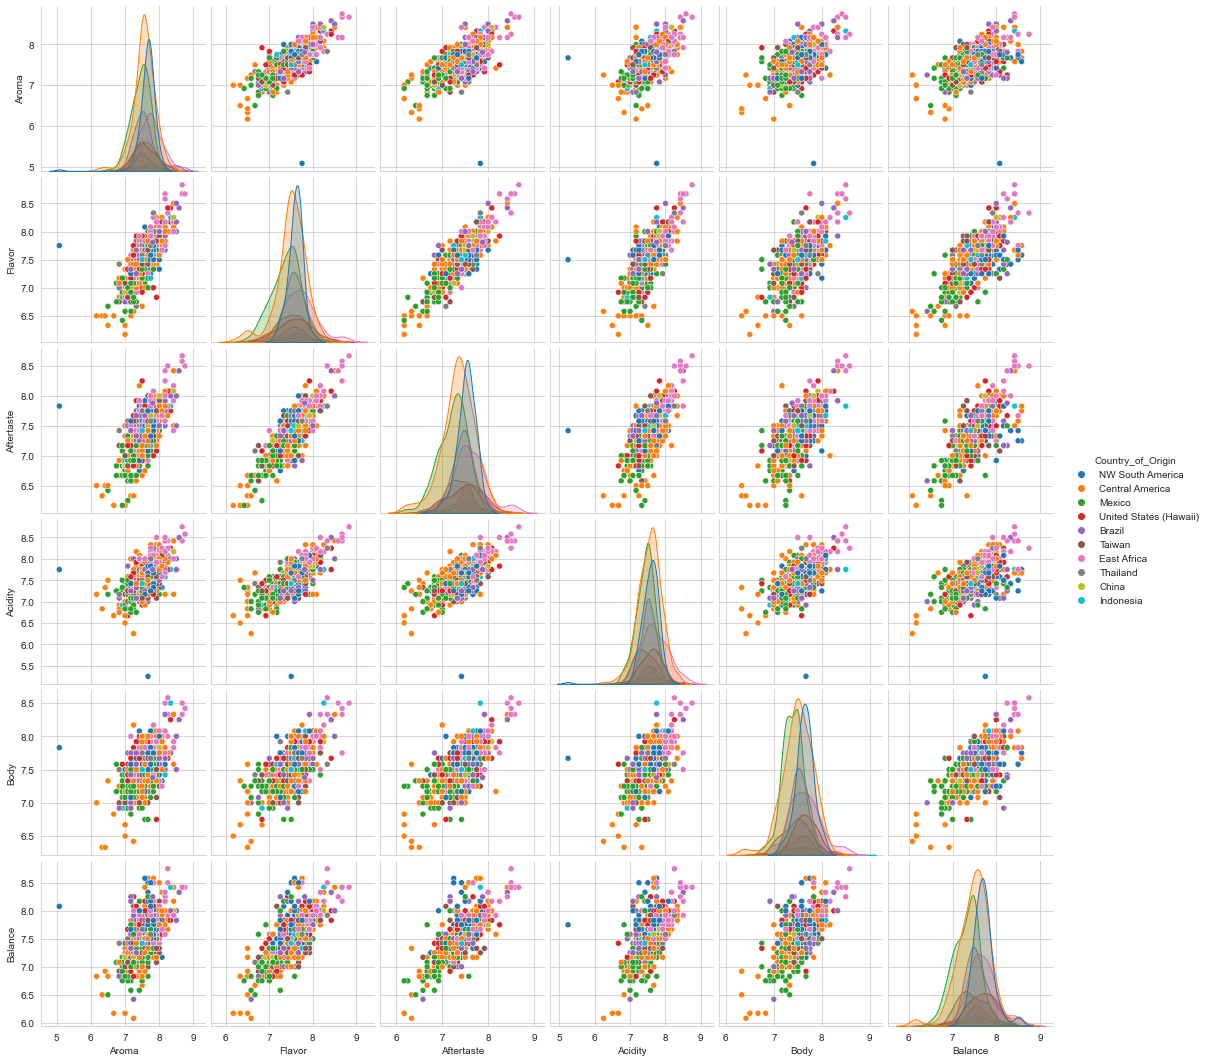

In [10]:
#make an initial pairplot to look at relationships between ratings and how they relate to the country of origin
sns.pairplot(coffee_train, vars = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"],  hue = "Country_of_Origin")

Here we see that the ratings generally have a positive trend when looking pairwise. 

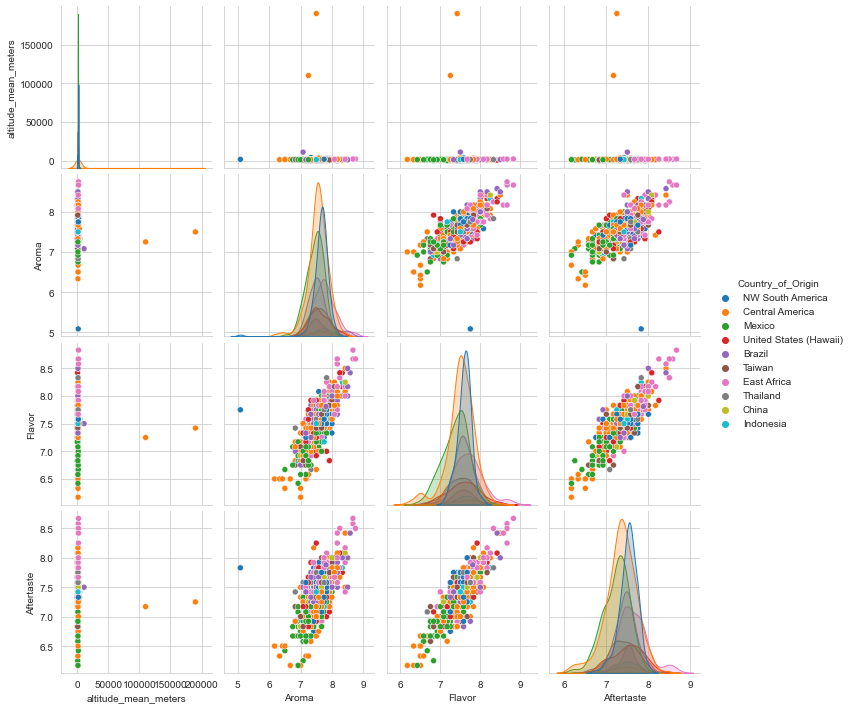

In [11]:
#Do the ratings have any obvious relationship to altitude?
sns.pairplot(coffee_train, vars = ["altitude_mean_meters", "Aroma", "Flavor", "Aftertaste"],  hue = "Country_of_Origin")

Again we see the rating outlier, but we now also see that a few samples have much higher mean altitudes which is obscuring the relationships.